## 1. Données sur le nombre de médailles selon le pays et l'année de la compétition

In [118]:
import pandas as pd

In [119]:
data = pd.read_json("output_medal.json")

In [120]:
data.head()

,Year,Status,Country,Gold,Silver,Bronze,Total
0,1916,Not held due to war,NaN,NaN,NaN,NaN,NaN
1,1896,NaN,United States,11.0,7.0,2.0,20.0
2,1896,NaN,Greece,10.0,18.0,19.0,47.0
3,1896,NaN,Germany,7.0,5.0,2.0,14.0
4,1896,NaN,France,5.0,4.0,2.0,11.0


In [121]:
nan_gold = data[data['Total'].isna()]
print(nan_gold)

     Year               Status Country  Gold  Silver  Bronze  Total
0    1916  Not held due to war     NaN   NaN     NaN     NaN    NaN
165  1944  Not held due to war     NaN   NaN     NaN     NaN    NaN
166  1940  Not held due to war     NaN   NaN     NaN     NaN    NaN


In [122]:
data = data.dropna(subset=['Total'])

In [123]:
# Convertir les colonnes en entiers
data['Gold'] = data['Gold'].astype(int)
data['Silver'] = data['Silver'].astype(int)
data['Bronze'] = data['Bronze'].astype(int)
data['Total'] = data['Total'].astype(int)

In [124]:
data[data["Year"] == 2000]

,Year,Status,Country,Gold,Silver,Bronze,Total
847,2000,NaN,United States,37,24,32,93
848,2000,NaN,Russian Federation,32,28,29,89
849,2000,NaN,People's Republic of China,28,16,14,58
850,2000,NaN,Australia,16,25,17,58
851,2000,NaN,Germany,13,17,26,56
...,...,...,...,...,...,...,...
922,2000,NaN,Israel,0,0,1,1
923,2000,NaN,Kuwait,0,0,1,1
924,2000,NaN,Kyrgyzstan,0,0,1,1
925,2000,NaN,North Macedonia,0,0,1,1


In [125]:
if data['Status'].isna().all():
    data = data.drop(columns=['Status'])

In [126]:
data[data["Year"] == 2000]

,Year,Country,Gold,Silver,Bronze,Total
847,2000,United States,37,24,32,93
848,2000,Russian Federation,32,28,29,89
849,2000,People's Republic of China,28,16,14,58
850,2000,Australia,16,25,17,58
851,2000,Germany,13,17,26,56
...,...,...,...,...,...,...
922,2000,Israel,0,0,1,1
923,2000,Kuwait,0,0,1,1
924,2000,Kyrgyzstan,0,0,1,1
925,2000,North Macedonia,0,0,1,1


## 1.1 Analyses exploratoires

In [127]:
data.describe()

,Year,Gold,Silver,Bronze,Total
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,1979.053571,4.098214,4.075893,4.422619,12.596726
std,33.292362,8.532668,7.204814,6.923255,21.922143
min,1896.000000,0.000000,0.000000,0.000000,1.000000
25%,1956.000000,0.000000,0.000000,1.000000,2.000000
50%,1988.000000,1.000000,2.000000,2.000000,5.000000
75%,2008.000000,4.000000,4.000000,5.000000,13.250000
max,2020.000000,83.000000,85.000000,83.000000,249.000000


In [128]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values_count = data.isnull().sum()
print(missing_values_count)

Year       0
Country    0
Gold       0
Silver     0
Bronze     0
Total      0
dtype: int64


Text(0, 0.5, 'Frequency')

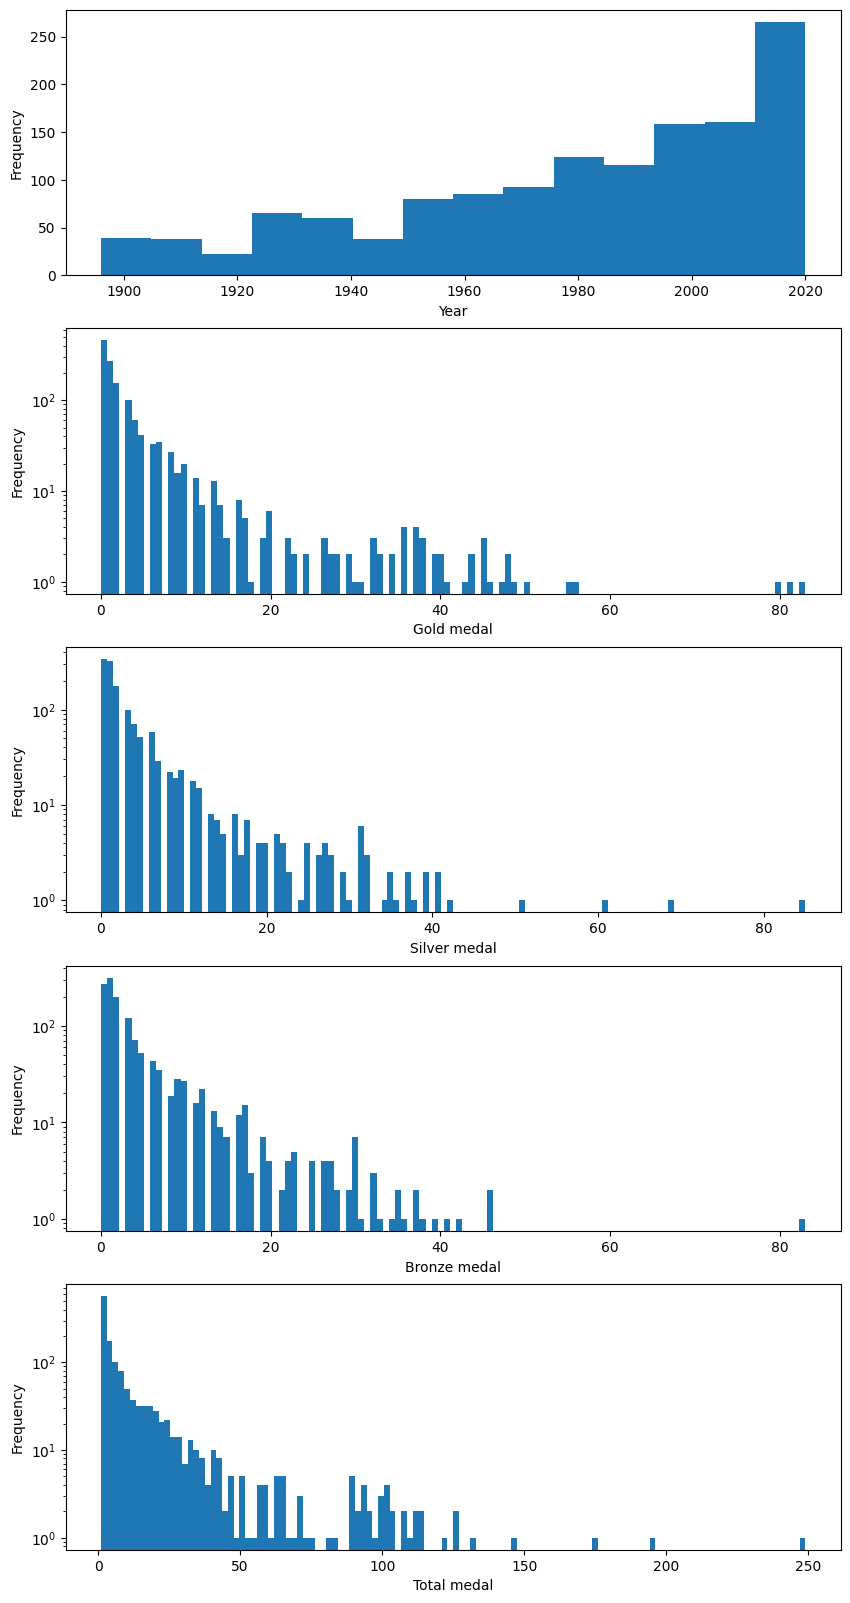

In [129]:
#Distribution des données selon le feature
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))

plt.subplot(5, 1, 1)
plt.hist(data["Year"], bins='auto')
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.subplot(5, 1, 2)
plt.hist(data["Gold"], bins='auto', log=True)
plt.xlabel("Gold medal")
plt.ylabel("Frequency")

plt.subplot(5, 1, 3)
plt.hist(data["Silver"], bins='auto', log=True)
plt.xlabel("Silver medal")
plt.ylabel("Frequency")

plt.subplot(5, 1, 4)
plt.hist(data["Bronze"], bins='auto', log=True)
plt.xlabel("Bronze medal")
plt.ylabel("Frequency")

plt.subplot(5, 1, 5)
plt.hist(data["Total"], bins='auto', log=True)
plt.xlabel("Total medal")
plt.ylabel("Frequency")

In [130]:
data[data["Total"] > 150]

,Year,Country,Gold,Silver,Bronze,Total
135,1904,United States,81,85,83,249
968,1980,Soviet Union,80,69,46,195
1056,1984,United States,83,61,30,174


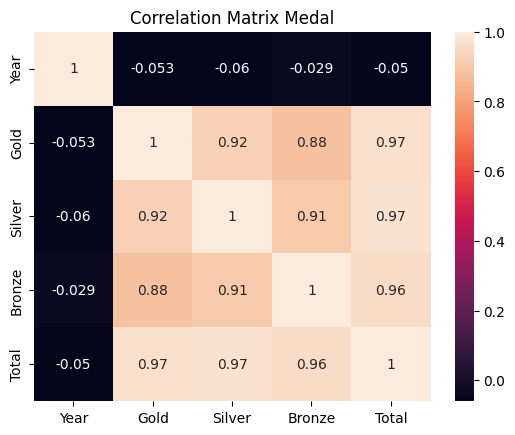

In [131]:
import seaborn as sns

data_without_country = data.copy()
data_without_country.drop('Country', axis=1, inplace=True)
correlation_matrix = data_without_country.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Medal')
plt.show()

## 2. Données des caractéristiques par pays

In [132]:
data_country = pd.read_json("output_country.json")

In [133]:
data_country.head()

,Country,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index,Currency,Governement
0,Angola,37290193,1246700,0.00,7077.0,51.30,0.591,AOA,"[Dominant-party, Presidential republic]"
1,Antigua and Barbuda,100772,440,0.00,25449.0,NaN,0.826,XCD,[Parliamentary system]
2,Andorra,81588,46763,0.26,68232.0,27.21,0.884,EUR,"[Parliamentary system, Coregency]"
3,Australia,27199000,7692024,1.79,66627.0,32.40,0.946,AUD,"[Federalism, Constitutional monarchy]"
4,Armenia,3165000,29743,4.71,21746.0,27.90,0.786,AMD,[Unitary parliamentary republic]


### 2.1 Ajuster les noms des pays provenant des deux sources de données

In [134]:
def compare_countries(data, data_country):
    data_countries = set(data['Country'])
    data_country_countries = set(data_country['Country'])
    missing_countries = data_countries - data_country_countries
    if missing_countries:
        print("Les pays présents dans 'data' mais absents dans 'data_country' sont :")
        for country in missing_countries:
            print(country)
    else:
        print("Tous les pays de 'data' sont présents dans 'data_country'.")

compare_countries(data, data_country)

Les pays présents dans 'data' mais absents dans 'data_country' sont :
Mixed team
People's Republic of China
East Germany
West Germany
Soviet Union
United Arab Republic
Serbia and Montenegro
Great Britain
Czechia
Independent Olympic Athletes
Syrian Arab Republic
Bohemia
ROC
Hong Kong, China
Republic of Korea
United States Virgin Islands
Netherlands Antilles
Islamic Republic of Iran
Chinese Taipei
Kingdom of Saudi Arabia
Republic of Moldova
United Republic of Tanzania
West Indies Federation
Russian Federation
Czechoslovakia
Ireland
Democratic People's Republic of Korea
Bermuda
Australasia
Puerto Rico
Denmark
Türkiye
Côte d'Ivoire
Yugoslavia
Unified Team
Netherlands
Georgia


In [135]:
data['Country'] = data['Country'].replace('Türkiye', 'Turkey')
data['Country'] = data['Country'].replace('Islamic Republic of Iran', 'Iran')
data['Country'] = data['Country'].replace("Côte d'Ivoire", 'Ivory Coast')
#data['Country'] = data['Country'].replace("United States Virgin Islands", 'United States')
data['Country'] = data['Country'].replace("People's Republic of China", 'China')
#data['Country'] = data['Country'].replace("Bermuda", 'United Kingdom')
data_country['Country'] = data_country['Country'].replace("Kingdom of the Netherlands", 'Netherlands')
data['Country'] = data['Country'].replace("Syrian Arab Republic", 'Syria')
data['Country'] = data['Country'].replace("Democratic People's Republic of Korea", 'North Korea')
data['Country'] = data['Country'].replace("Great Britain", 'United Kingdom')
data['Country'] = data['Country'].replace("Ireland", 'Republic of Ireland')
#data['Country'] = data['Country'].replace("Hong Kong, China", 'China')
#Cas historic : data['Country'] = data['Country'].replace("Serbia and Montenegro")
data['Country'] = data['Country'].replace("Republic of Moldova", 'Moldova')
data['Country'] = data['Country'].replace("United Republic of Tanzania", 'Tanzania')
#Cas historic : data['Country'] = data['Country'].replace("Bohemia")
data_country['Country'] = data_country['Country'].replace("Georgia (country)", 'Georgia')
#data['Country'] = data['Country'].replace("Puerto Rico", 'United States')
#Cas historic : data['Country'] = data['Country'].replace("West Germany")
#data['Country'] = data['Country'].replace("Unified Team")
#Cas historic : data['Country'] = data['Country'].replace("Yugoslavia")
data['Country'] = data['Country'].replace("Czechia", 'Czech Republic')
#Cas historic : data['Country'] = data['Country'].replace("Soviet Union')
data['Country'] = data['Country'].replace("Russian Federation", 'Russia')
#data['Country'] = data['Country'].replace("Netherlands Antilles", 'Netherlands')
#data['Country'] = data['Country'].replace("Independent Olympic Athletes")
#Cas historic : data['Country'] = data['Country'].replace("East Germany")
data['Country'] = data['Country'].replace("Republic of Korea", 'South Korea')
data['Country'] = data['Country'].replace("Kingdom of Saudi Arabia", 'Saudi Arabia')
#Cas historic : data['Country'] = data['Country'].replace("Czechoslovakia") 
data_country['Country'] = data_country['Country'].replace("Danish Realm", 'Denmark')
data['Country'] = data['Country'].replace("ROC", "Russia")
data['Country'] = data['Country'].replace("Chinese Taipei", 'Taiwan')
#data['Country'] = data['Country'].replace("Mixed team")
#Cas historic : data['Country'] = data['Country'].replace("West Indies Federation")
#data['Country'] = data['Country'].replace("Australasia")
#Cas historic : data['Country'] = data['Country'].replace("United Arab Republic")

In [136]:
compare_countries(data, data_country)

Les pays présents dans 'data' mais absents dans 'data_country' sont :
Australasia
Puerto Rico
Serbia and Montenegro
United States Virgin Islands
Netherlands Antilles
Mixed team
East Germany
Yugoslavia
West Germany
United Arab Republic
Soviet Union
Independent Olympic Athletes
West Indies Federation
Bohemia
Unified Team
Czechoslovakia
Hong Kong, China
Bermuda


### 2.2 Exporter les données sur les médailles (data_medal.json)

In [137]:
import json
# Sauvegarder le DataFrame en fichier JSON
data.to_json('Projet/data_medal.json')

records = data.to_dict(orient='records')

json_string = "[\n" + ",\n".join(json.dumps(record) for record in records) + "\n]"

# Sauvegarder le résultat dans un fichier
with open('Projet/data_medal.json', 'w') as file:
    file.write(json_string)

### 2.3 Réduction des mots clés pour la colonne sur le type de gouvernement

In [138]:
governments = set()
for item_list in data_country['Governement']:
    for item in item_list:
        governments.add(item)

for government in sorted(governments):
    print(government)

Absolute monarchy
Assembly-independent
Assembly-independent republic
Authoritarian
Authoritarianism
Communist state
Confessionalism (politics)
Constitutional monarchy
Constitutional republic
Coregency
Devolution
Dictatorship
Direct democracy
Directorial republic
Directorial system
Dominant-party
Dominant-party system
Dynasty
Elective monarchy
Emirate
Federal monarchy
Federal parliamentary republic
Federal republic
Federalism
Federalism in the United States
Federation
Hereditary dictatorship
Hereditary_dictatorship
Islamic republic
Islamic state
List of countries by system of government
Marxism–Leninism
Marxist–Leninist
Military junta
Non-partisan democracy
Parliamentary
Parliamentary constitutional monarchy
Parliamentary republic
Parliamentary republic with an executive presidency
Parliamentary system
Presidential republic
Presidential system
Presidential_system
Provisional government
Republic
Semi-constitutional monarchy
Semi-presidential
Semi-presidential republic
Semi-presidential s

In [139]:
import numpy as np 
mapping = {
    "Absolute monarchy": "Monarchy",
    "Assembly-independent republic": "Republic",
    "Authoritarian": "Authoritarian",
    "Authoritarianism": "Authoritarian",
    "Communist state": "Authoritarian",
    "Constitutional monarchy": "Monarchy",
    "Constitutional republic": "Republic",
    "Dictatorship": "Authoritarian",
    "Directorial republic": "Republic",
    "Directorial system": "Republic",
    "Dynasty": "Monarchy",
    "Elective monarchy": "Monarchy",
    "Emirate": "Monarchy",
    "Federal monarchy": "Monarchy",
    "Federal parliamentary republic": "Republic",
    "Federal republic": "Republic",
    "Federalism": "Federation",
    "Federalism in the United States": "Republic",
    "Hereditary dictatorship": "Authoritarian",
    "Hereditary_dictatorship": "Authoritarian",
    "Islamic republic": "Republic",
    "Islamic state": "Theocratic",
    "Military junta": "Military",
    "Parliamentary": "Monarchy",
    "Parliamentary constitutional monarchy": "Monarchy",
    "Parliamentary republic": "Republic",
    "Parliamentary republic with an executive presidency": "Republic",
    "Parliamentary system": "Monarchy",
    "Presidential republic": "Republic",
    "Presidential system": "Republic",
    "Republic": "Republic",
    "Semi-constitutional monarchy": "Monarchy",
    "Semi-presidential": "Republic",
    "Semi-presidential_republic": "Republic",
    "Semi-presidential republic": "Republic",
    "Semi-presidential system": "Republic",
    "Socialist republic": "One-party states",
    "Socialist state": "One-party states",
    "Theocracy": "Theocratic",
    "Totalitarian": "Authoritarian",
    "Totalitarianism": "Authoritarian",
    "Unitary parliamentary republic": "Republic",
    "List of countries by system of government": "Republic"
}


def simplify_system(gov_list):
    if not gov_list:  # Vérifie si la liste est vide
        return np.nan  # Retourne NaN pour les listes vides
    categories = set()
    for government in gov_list:
        category = mapping.get(government)  # Utilise get pour éviter KeyError si non trouvé
        if category:  # Assure que la catégorie n'est pas None
            categories.add(category)
    return list(categories) if categories else np.nan  # Retourne NaN si aucune catégorie valide n'est trouvée

data_country['Simplified_Government'] = data_country['Governement'].apply(simplify_system)

print(data_country[['Governement', 'Simplified_Government']])
#print(data_country[data_country['Simplified_Government'].isna()])

                                        Governement   Simplified_Government
0           [Dominant-party, Presidential republic]              [Republic]
1                            [Parliamentary system]              [Monarchy]
2                 [Parliamentary system, Coregency]              [Monarchy]
3             [Federalism, Constitutional monarchy]  [Monarchy, Federation]
4                  [Unitary parliamentary republic]              [Republic]
..                                              ...                     ...
198                         [Presidential republic]              [Republic]
199           [Federalism, Constitutional monarchy]  [Monarchy, Federation]
200                       [Constitutional monarchy]              [Monarchy]
201                    [Semi-presidential_republic]              [Republic]
202  [Presidential_system, Hereditary_dictatorship]         [Authoritarian]

[203 rows x 2 columns]


In [140]:
governments = set()
for item_list in data_country['Simplified_Government']:
    for item in item_list:
        governments.add(item)

for government in sorted(governments):
    print(government)

Authoritarian
Federation
Military
Monarchy
One-party states
Republic
Theocratic


### 2.4 Nettoyage des données avec les mots clés simplifiés pour le gouvernement

In [141]:
# Copier le DataFrame
data_country2 = data_country.copy()

# Supprimer la colonne 'Government' du DataFrame copié
data_country2.drop('Governement', axis=1, inplace=True)

In [142]:
data_country2.describe()

,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index
count,2.030000e+02,2.030000e+02,180.000000,201.000000,169.000000,192.000000
mean,5.169575e+09,1.870328e+11,2.762751,27034.283582,37.616923,0.722339
std,7.308918e+10,2.664791e+12,4.131844,29135.452899,8.196092,0.153481
min,7.640000e+02,2.100000e+01,0.000000,852.000000,21.200000,0.380000
25%,1.434456e+06,2.155650e+04,0.407500,5765.000000,31.800000,0.601750
50%,8.902308e+06,1.200000e+05,1.500000,16775.000000,36.400000,0.739500
75%,3.078330e+07,5.810485e+05,3.095000,42738.000000,42.000000,0.841750
max,1.041398e+12,3.796743e+13,28.000000,143743.000000,63.000000,0.967000


In [143]:
data_country2[data_country2["Total area"] > 20000000]

,Country,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index,Currency,Simplified_Government
19,Chile,19629588,75610196,2.10,29934.0,46.0,0.860,CLP,[Republic]
95,United States,334914895,37967429833520,7.00,85373.0,39.4,0.927,USD,[Republic]
109,Vietnam,100300000,33134482,6.38,15470.0,35.7,0.726,VND,[One-party states]


In [144]:
data_country2['Total area'] = data_country2['Total area'].replace(37967429833520, 9833520)
data_country2['Total area'] = data_country2['Total area'].replace(75610196, 756101)
data_country2['Total area'] = data_country2['Total area'].replace(33134482, 331344)
data_country2['Total area'] = data_country2['Total area'].replace(4721, 1904569) #erreur pour indonesia
data_country2['Total area'] = data_country2['Total area'].replace(3058, 100210) #erreur pour corée du sud

In [145]:
data_country2[data_country2["Total population"] > 1500000000]

,Country,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index,Currency,Simplified_Government
172,Greece,1041398212023,131957,1.51,41188.0,31.8,0.893,EUR,[Republic]


In [146]:
data_country2['Total population'] = data_country2['Total population'].replace(1041398212023, 10413982)

In [147]:
# https://en.wikipedia.org/wiki/Danish_Realm au lieu de https://en.wikipedia.org/wiki/Denmark donc il y a des erreurs 
data_country2['Total population'] = data_country2['Total population'].replace(6049579, 5935619)
data_country2['Total area'] = data_country2['Total area'].replace(380, 1904569)
data_country2.loc[data_country2['Country'] == 'Denmark', 'Water area (%)'] = 1.74 
data_country2['PIB per capita'] = data_country2['PIB per capita'].replace(62814,77641)
data_country2.loc[data_country2['Country'] == 'Denmark', 'Gini coefficient'] = 27.7
data_country2.loc[data_country2['Country'] == 'Denmark', 'Human Development Index'] = 0.952

In [148]:
# même souci : https://en.wikipedia.org/wiki/Kingdom_of_the_Netherlands au lieu de https://en.wikipedia.org/wiki/Netherlands

data_country2.loc[data_country2['Country'] == 'Netherlands', 'Total population'] = 18109300
data_country2.loc[data_country2['Country'] == 'Netherlands', 'Total area'] = 41865
data_country2.loc[data_country2['Country'] == 'Netherlands', 'Water area (%)'] = 18.41
data_country2.loc[data_country2['Country'] == 'Netherlands', 'PIB per capita'] = 68575
data_country2.loc[data_country2['Country'] == 'Netherlands', 'Gini coefficient'] = 26
data_country2.loc[data_country2['Country'] == 'Netherlands', 'Human Development Index'] = 0.941

### 2.5 Analyses exploratoires

In [149]:
data_country2.describe()

,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index
count,2.030000e+02,2.030000e+02,181.000000,202.000000,171.000000,193.000000
mean,3.958678e+07,7.040319e+05,2.754062,27313.331683,37.490994,0.723492
std,1.460545e+08,1.886927e+06,4.109224,29317.754506,8.230554,0.153918
min,7.640000e+02,2.100000e+01,0.000000,852.000000,21.200000,0.380000
25%,1.434456e+06,2.431800e+04,0.410000,5773.750000,31.650000,0.602000
50%,8.902308e+06,1.303750e+05,1.500000,16818.000000,36.400000,0.740000
75%,3.059243e+07,5.872630e+05,3.060000,43068.750000,41.950000,0.844000
max,1.428628e+09,1.709825e+07,28.000000,143743.000000,63.000000,0.967000


In [150]:
missing_values_count = data_country2.isnull().sum()
print(missing_values_count)

Country                     0
Total population            0
Total area                  0
Water area (%)             22
PIB per capita              1
Gini coefficient           32
Human Development Index    10
Currency                   11
Simplified_Government       0
dtype: int64


In [152]:
# Les valeurs manquantes sont principalement dues à l'absence de ces informations sur les pages Wikipedia des pays concernés.

Text(0, 0.5, 'Frequency')

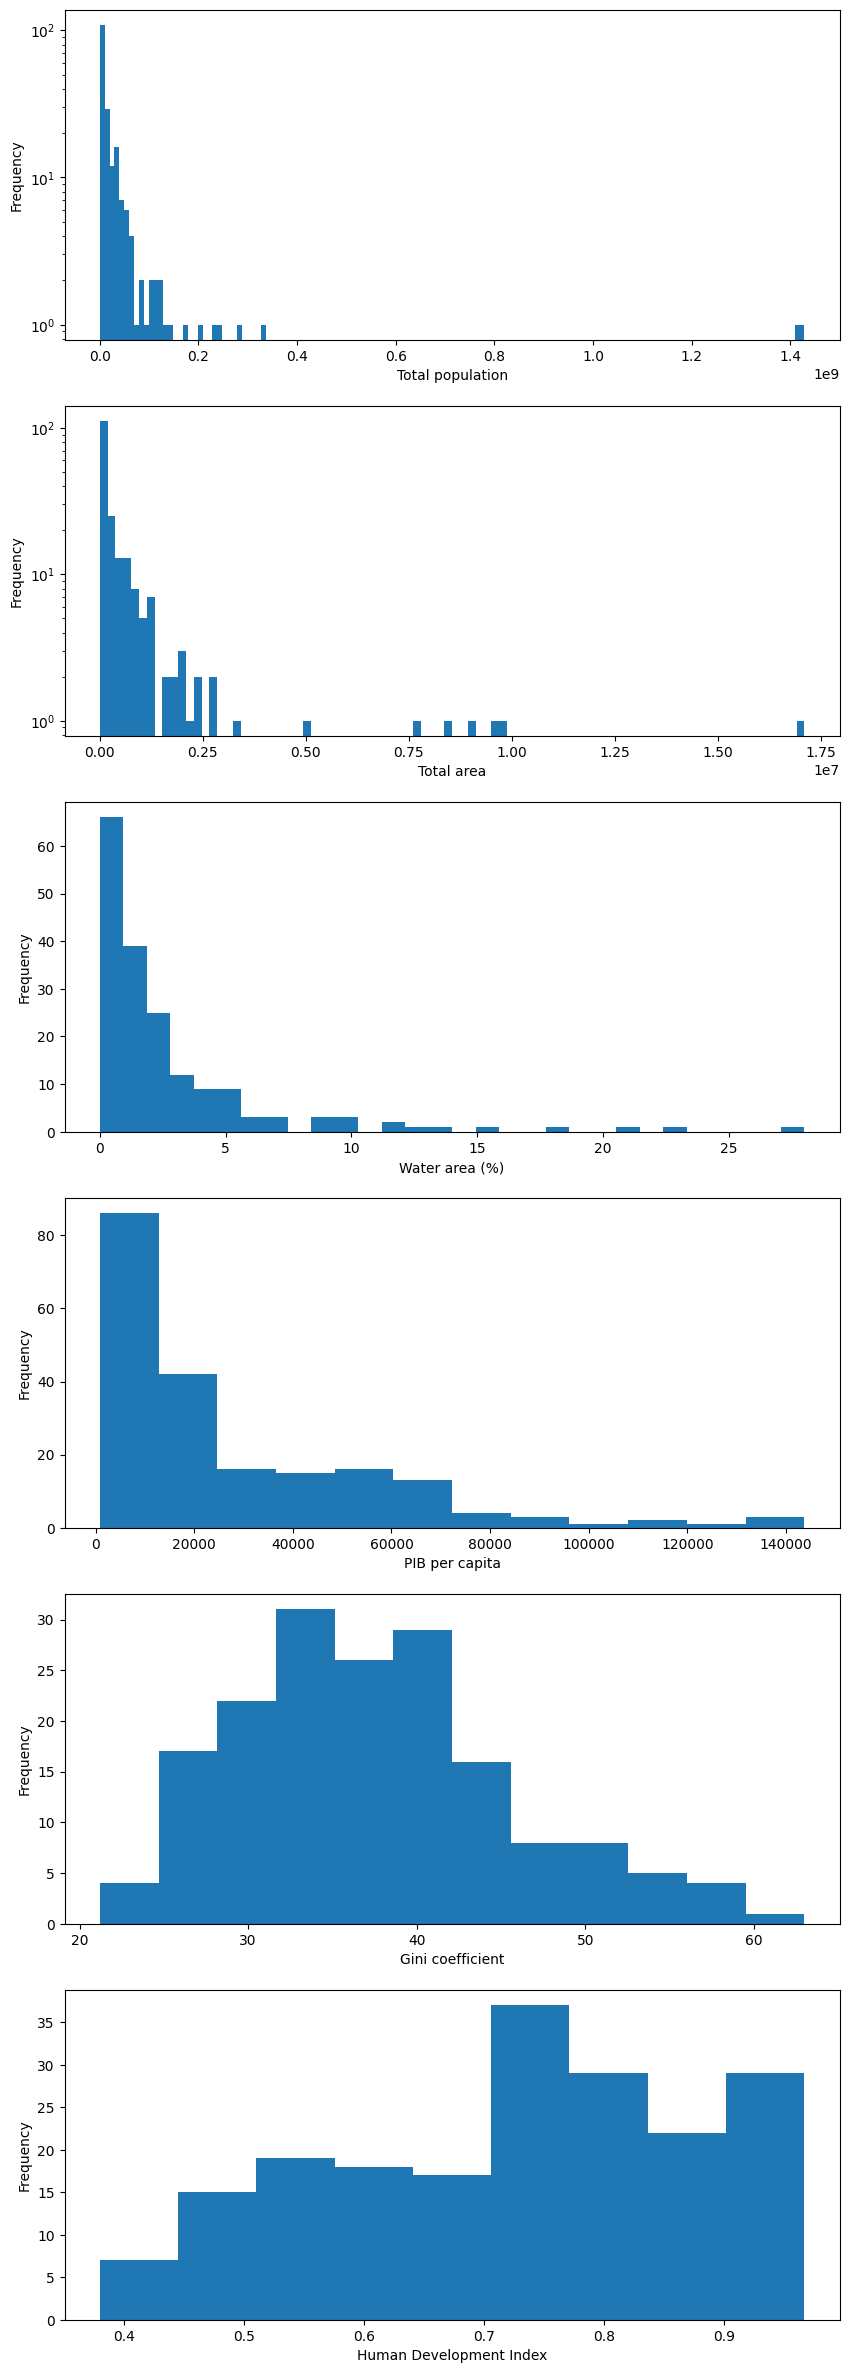

In [151]:
import matplotlib.pyplot as plt

#Distribution des données selon le feature
plt.figure(figsize=(10, 30))

plt.subplot(6, 1, 1)
plt.hist(data_country2["Total population"], bins='auto', log=True)
plt.xlabel("Total population")
plt.ylabel("Frequency")

plt.subplot(6, 1, 2)
plt.hist(data_country2["Total area"], bins='auto', log=True)
plt.xlabel("Total area")
plt.ylabel("Frequency")

plt.subplot(6, 1, 3)
plt.hist(data_country2["Water area (%)"], bins='auto')
plt.xlabel("Water area (%)")
plt.ylabel("Frequency")

plt.subplot(6, 1, 4)
plt.hist(data_country2["PIB per capita"], bins='auto')
plt.xlabel("PIB per capita")
plt.ylabel("Frequency")

plt.subplot(6, 1, 5)
plt.hist(data_country2["Gini coefficient"], bins='auto')
plt.xlabel("Gini coefficient")
plt.ylabel("Frequency")

plt.subplot(6, 1, 6)
plt.hist(data_country2["Human Development Index"], bins='auto')
plt.xlabel("Human Development Index")
plt.ylabel("Frequency")

In [153]:
data_country2[data_country2["Total population"] > 100000000]

,Country,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index,Currency,Simplified_Government
18,Bangladesh,169828911,148460,6.400,9410.0,49.9,0.670,BDT,[Republic]
20,China,1409670000,9596961,2.800,25015.0,37.1,0.788,CNY,[One-party states]
25,Ethiopia,127955823,1112000,0.700,4019.0,35.0,0.492,ETB,[Republic]
32,Egypt,111247248,1010408,0.632,17614.0,31.5,0.728,EGP,"[Authoritarian, Republic]"
50,Japan,123970000,377975,1.400,54184.0,33.4,0.920,None,[Monarchy]
65,Pakistan,241499431,881913,2.860,6955.0,29.6,0.540,PKR,[Republic]
66,Nigeria,230842743,923769,1.400,6147.0,35.1,0.548,NGN,[Republic]
95,United States,334914895,9833520,7.000,85373.0,39.4,0.927,USD,[Republic]
109,Vietnam,100300000,331344,6.380,15470.0,35.7,0.726,VND,[One-party states]
133,Russia,147182123,17098246,13.000,38292.0,36.0,0.821,RUB,"[Authoritarian, Republic]"


In [154]:
data_country2[data_country2["Total area"] > 1500000]

,Country,Total population,Total area,Water area (%),PIB per capita,Gini coefficient,Human Development Index,Currency,Simplified_Government
3,Australia,27199000,7692024,1.79,66627.0,32.4,0.946,AUD,"[Monarchy, Federation]"
5,Algeria,45400000,2381741,1.10,13681.0,27.6,0.745,DZD,[Republic]
10,Argentina,47327407,2780400,1.57,26390.0,42.3,0.849,ARS,[Republic]
20,China,1409670000,9596961,2.80,25015.0,37.1,0.788,CNY,[One-party states]
46,Kazakhstan,20075271,2724900,1.70,34534.0,27.8,0.802,KZT,"[Authoritarian, Republic]"
56,Iran,89705600,1648195,1.63,21220.0,40.9,0.780,IRR,[Republic]
79,Sudan,50467278,1886068,NaN,3604.0,34.2,0.516,SDG,"[Military, Republic]"
95,United States,334914895,9833520,7.00,85373.0,39.4,0.927,USD,[Republic]
129,Saudi Arabia,32175224,2149690,0.70,70333.0,45.9,0.875,SAR,[Monarchy]
133,Russia,147182123,17098246,13.00,38292.0,36.0,0.821,RUB,"[Authoritarian, Republic]"


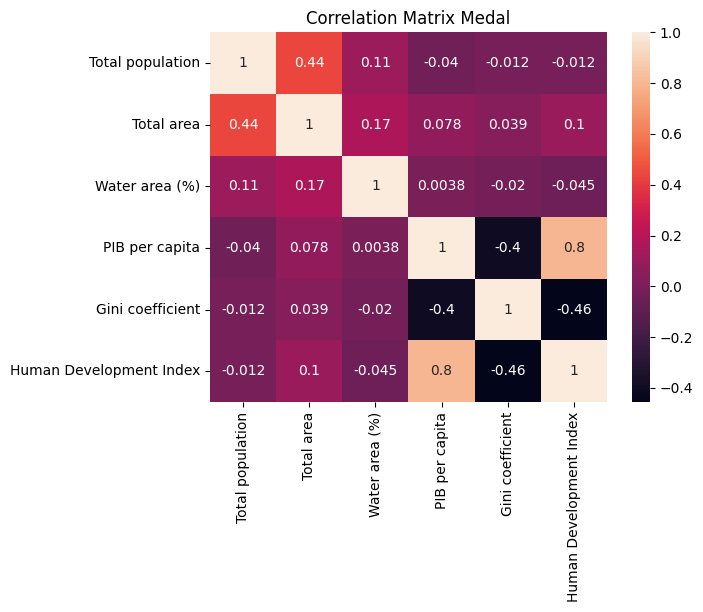

In [155]:
data_without_country_currency_gov = data_country2.copy()
data_without_country_currency_gov.drop(['Country', 'Currency', 'Simplified_Government'], axis=1, inplace=True)
correlation_matrix = data_without_country_currency_gov.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Medal')
plt.show()

### 2.6 Exporter les données sur les caractéristiques des pays (data_country.json)

In [156]:
import json
import numpy as np

# Sauvegarder le DataFrame en fichier JSON
data_country2.to_json('Projet/data_country.json')

data_country2 = data_country2.replace({np.nan: None})

records = data_country2.to_dict(orient='records')

json_string = "[\n" + ",\n".join(json.dumps(record) for record in records) + "\n]"

# Sauvegarder le résultat dans un fichier
with open('Projet/data_country.json', 'w') as file:
    file.write(json_string)

## 3. Données des disciplines par année d'événement

In [157]:
data_disciplines = pd.read_json("output_disciplines.json")

In [158]:
data_disciplines.head()

,Year,Disciplines
0,1896,"[Gymnastics, Athletics, Weightlifting, Cycling..."
1,1916,Not held due to war
2,1900,"[Sailing, Athletics, Basque pelota, Shooting, ..."
3,1908,"[Hockey, Sailing, Lacrosse, Athletics, Shootin..."
4,1940,Not held due to war


In [159]:
all_disciplines = [discipline for sublist in data_disciplines['Disciplines'] if isinstance(sublist, list) for discipline in sublist]
unique_disciplines = set(all_disciplines)

print("Disciplines uniques :")
for discipline in sorted(unique_disciplines):
    print(discipline)

Disciplines uniques :
Aeronautics
Alpinism
Aquatics
Archery
Art Competitions
Athletics
Badminton
Baseball
Basketball
Basque pelota
Boxing
Canoe
Cricket
Croquet
Cycling
Equestrian
Fencing
Figure Skating
Football
Golf
Gymnastics
Handball
Hockey
Ice Hockey
Jeu De Paume
Judo
Karate
Lacrosse
Modern Pentathlon
Motorboating
Polo
Racquets
Roque
Rowing
Rugby
Sailing
Shooting
Skateboarding
Softball
Sport Climbing
Surfing
Table Tennis
Taekwondo
Tennis
Triathlon
Tug-Of-War
Volleyball
Weightlifting
Wrestling


### 3.1 Exporter les données sur les disciplines (data_disciplines.json)

In [160]:
# Sauvegarder le DataFrame en fichier JSON
data_disciplines.to_json('Projet/data_disciplines.json')

records = data_disciplines.to_dict(orient='records')

json_string = "[\n" + ",\n".join(json.dumps(record) for record in records) + "\n]"

# Sauvegarder le résultat dans un fichier
with open('Projet/data_disciplines.json', 'w') as file:
    file.write(json_string)

## 4. Données des pays hôtes par année d'événement

In [161]:
data_host = pd.read_json("output_host.json")

In [162]:
data_host.head()

,Year,Host city,Host country
0,1916,Berlin,Germany
1,1896,Athina,Greece
2,1908,London,Great Britain
3,1904,St. Louis,United States
4,1900,Paris,France


### 4.1 Ajuster les noms des pays provenant des deux sources de données

In [163]:
def compare_countries(data, data_country2):
    data_countries = set(data['Host country'])
    data_country_countries = set(data_country2['Country'])
    missing_countries = data_countries - data_country_countries
    if missing_countries:
        print("Les pays présents dans 'data_host' mais absents dans 'data_country' sont :")
        for country in missing_countries:
            print(country)
    else:
        print("Tous les pays de 'data_host' sont présents dans 'data_country'.")

compare_countries(data_host, data_country2)

Les pays présents dans 'data_host' mais absents dans 'data_country' sont :
Republic of Korea
Great Britain
People's Republic of China
West Germany
Soviet Union


In [164]:
data_host['Host country'] = data_host['Host country'].replace('Great Britain', 'United Kingdom')
data_host['Host country'] = data_host['Host country'].replace("Republic of Korea", 'South Korea')
data_host['Host country'] = data_host['Host country'].replace("People's Republic of China", 'China')

In [165]:
compare_countries(data_host, data_country2)

Les pays présents dans 'data_host' mais absents dans 'data_country' sont :
Soviet Union
West Germany


In [166]:
data_host['Host country'] = data_host['Host country'].replace("Soviet Union", 'Russia')
data_host['Host country'] = data_host['Host country'].replace("West Germany", 'Germany')

### 4.2 Joindre les données des pays hôtes avec leurs caractéristiques

In [167]:
# Jointure des DataFrames
data_host.rename(columns={'Host country': 'Country'}, inplace=True)
df_combined = pd.merge(data_host, data_country2, on='Country', how='inner')
print(df_combined)

    Year         Host city         Country  Total population  Total area  \
0   1916            Berlin         Germany          84607016      357600   
1   1896            Athina          Greece          10413982      131957   
2   1908            London  United Kingdom          67596281      244376   
3   1904         St. Louis   United States         334914895     9833520   
4   1900             Paris          France          68373433      643801   
5   1920         Antwerpen         Belgium          11697557       30689   
6   1912         Stockholm          Sweden          10540886      450295   
7   1932       Los Angeles   United States         334914895     9833520   
8   1924             Paris          France          68373433      643801   
9   1940          Helsinki         Finland           5603851      338145   
10  1944            London  United Kingdom          67596281      244376   
11  1928         Amsterdam     Netherlands          18109300       41865   
12  1936    

### 4.3 Exporter les données des pays hôtes (Combined_country_host.json)

In [168]:
# Sauvegarder le DataFrame en fichier JSON
df_combined.to_json('Projet/Combined_country_host.json')

df_combined = df_combined.replace({np.nan: None})

records = df_combined.to_dict(orient='records')

json_string = "[\n" + ",\n".join(json.dumps(record) for record in records) + "\n]"

# Sauvegarder le résultat dans un fichier
with open('Projet/Combined_country_host.json', 'w') as file:
    file.write(json_string)